# Communicate Data Findings - Ford GoBike System (Project 7) 
## by Abdulrahman Almogbil

## Preliminary Wrangling

- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
- The system serves both customers and subsribers to get bike rides within San Francisco Bay area.
- this dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired.
- The data will be communicated is related to **2019**.

**Data Features**:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [177]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import datetime as dt
import matplotlib.ticker as tick
%matplotlib inline

### Data Gathering and Assessment

In [2]:
# first we need to read all 12 months datasets 
data = ['\data\201901-fordgobike-tripdata.csv',
              '\data\201902-fordgobike-tripdata.csv',
              '\data\201903-fordgobike-tripdata.csv',
              '\data\201904-fordgobike-tripdata.csv',
              '\data\201905-fordgobike-tripdata.csv',
              '\data\201906-fordgobike-tripdata.csv',
              '\data\201907-fordgobike-tripdata.csv',
              '\data\201908-fordgobike-tripdata.csv',
              '\data\201909-fordgobike-tripdata.csv',
              '\data\201910-fordgobike-tripdata.csv',
              '\data\201911-fordgobike-tripdata.csv',
              '\data\201912-fordgobike-tripdata.csv']
            

In [3]:
# second we need to join all 12 datasets into one dataframe using pandas concat function
# glob function helps us with joining all files in specified directory with csv extension
df = pd.concat([pd.read_csv(f,) for f in glob.glob("data" + "/*.csv")],ignore_index=True)

C:\Users\Abdulrahman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Abdulrahman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Abdulrahman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [142]:
# check the result of joining all datasets
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [5]:
# check number of columns vs rows in our dataframe, using shape function
df.shape

(2506983, 15)

In [6]:
# check for duplicated data
sum(df.duplicated())

0

In [7]:
# check how many unique bikes in our dataset
df.bike_id.nunique()

11070

In [8]:
# check if there is any null values 
df.count()

duration_sec               2506983
start_time                 2506983
end_time                   2506983
start_station_id           2426249
start_station_name         2426850
start_station_latitude     2506983
start_station_longitude    2506983
end_station_id             2424081
end_station_name           2424633
end_station_latitude       2506983
end_station_longitude      2506983
bike_id                    2506983
user_type                  2506983
bike_share_for_all_trip    2263724
rental_access_method        120838
dtype: int64

In [9]:
# check quick statistical summary of the dataframe using describe function
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [10]:
# check dataframe structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


**Let us make a copy of our dataframe.**

In [94]:
df_copy = df.copy()
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [95]:
# drop columns which are not helpful for further analysis
df_copy.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude','rental_access_method'], axis=1, inplace=True)
# check the result 
df_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,Cyril Magnin St at Ellis St,Valencia St at 24th St,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,Downtown Berkeley BART,65th St at Hollis St,2717,Customer,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,Church St at Duboce Ave,Grove St at Divisadero,4557,Customer,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,Steuart St at Market St,The Embarcadero at Bryant St,2100,Customer,No


In [96]:
# fixing datatypes 
df_copy['start_time'] = pd.to_datetime(df['start_time'])
df_copy['end_time'] = pd.to_datetime(df['end_time'])

In [97]:
# check values of bike_share_for_all_trip
df_copy.bike_share_for_all_trip.unique()

array(['No', 'Yes', nan], dtype=object)

In [98]:
# check if there is any null values 
df_copy.count()

duration_sec               2506983
start_time                 2506983
end_time                   2506983
start_station_name         2426850
end_station_name           2424633
bike_id                    2506983
user_type                  2506983
bike_share_for_all_trip    2263724
dtype: int64

**We have missing values in start_station_name, end_station_name, and bike_share_for_all_trip.**

In [99]:
# remove rows with null values. 
df_copy.dropna(inplace=True)

In [100]:
# check if null values have been removed.
df_copy.count()

duration_sec               2262979
start_time                 2262979
end_time                   2262979
start_station_name         2262979
end_station_name           2262979
bike_id                    2262979
user_type                  2262979
bike_share_for_all_trip    2262979
dtype: int64

In [101]:
# check info of the copied dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2355470
Data columns (total 8 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_name       object        
 4   end_station_name         object        
 5   bike_id                  int64         
 6   user_type                object        
 7   bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 155.4+ MB


### What is the structure of your dataset?

There are 8 features associated with the dataframes. We have 11070 unique bikes, with 2262979 rows. features are duration_sec, start_time, end_time, start_station_name, end_station_name, bike_id, user_type, and bike_share_for_all_trip. There is one numeric variable "duration_sec", bike_id won't be taken to futther analysis. Other columns are considered categorical, except for start and end time they are in date_time format.

### What is/are the main feature(s) of interest in your dataset?

- Average bike trips. 
- Average bike trip vs user_type.
- Trend per month for bike trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The duration_sec should help us with average trip time. user_type should help us with users' classification based on trip time. bike_share_for_all_trip should help us to show if user would share trip with others. 

## Univariate Exploration
In this section, investigate distributions of individual variables. 

**Q1: On average, what is the duration time for a trip in seconds and minutes?**

- **Average bike trips in seconds.**

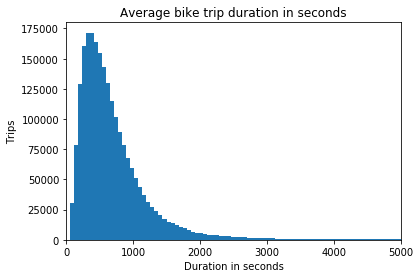

In [102]:
# plot average trip duration in seconds
#bin edgs to adjust our histogram
bin_edges = np.arange(0, df_copy['duration_sec'].max() + 100 , 60)
#histogram
plt.hist(data = df_copy , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,5000)
plt.title('Average bike trip duration in seconds')
plt.xlabel('Duration in seconds')
plt.ylabel('Trips');

As shown above, the histogram shows that there are total of 175000 trip, average of almost 500 second per trip. Calculating the same graph in minutes will give us a clear insight about what is going on. 

- **Average bike trips in minutes.**

In [103]:
# first we need to convert duration in second to minutes. Therefore, we will add a new column called duration in minute 
df_copy['duration_min'] = df_copy['duration_sec']/60

#check result
df_copy.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,duration_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,4861,Subscriber,No,1347.083333


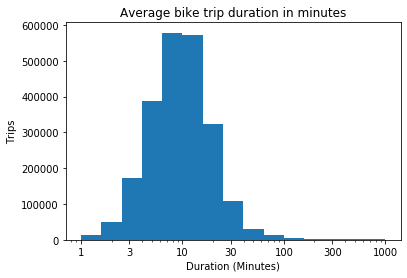

In [104]:
# using log transforming to get understandble data
bins = 10**np.arange(0 , 3 + 0.2 , 0.2)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_copy , x = 'duration_min' , bins = bins);
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Trips')
plt.title('Average bike trip duration in minutes');

As shwon above, average trips take almost 10 minutes on average. 

**Q2: What user type considered with more trips?**:

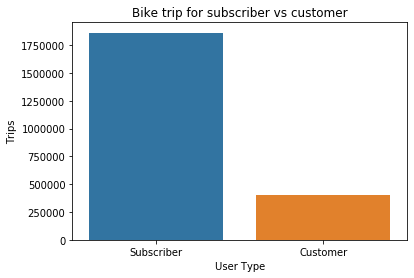

In [105]:
# count each of user_type
sb.countplot(data=df_copy,x='user_type').set_title('Bike trip for subscriber vs customer')
plt.xlabel('User Type')
plt.ylabel('Trips');

It is quite obvious, subscribers got more trips than customers. 

**Q3: What is the trend of bike trips per month based on the datasets given?**

In [106]:
# first we need to create a month column has the value of the month 
# .month function would help us to get our month in numberic value from start_time date time value
df_copy['month'] = pd.DatetimeIndex(df_copy['start_time']).month

# check the result
df_copy.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,duration_min,month
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,4861,Subscriber,No,1347.083333,1


In [179]:
# add week day column
df_copy['week_day'] = pd.DatetimeIndex(df_copy['start_time']).day_name()
#check result
df_copy.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,duration_min,month,week_day
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,4861,Subscriber,No,1347.083333,1,Thursday


In [107]:
df_copy.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

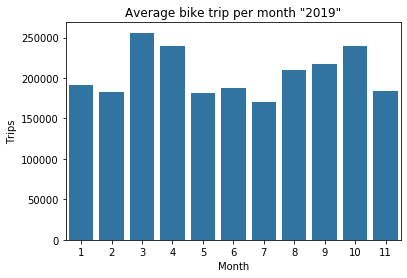

In [108]:
# countplotting month to get number of trips in each month
sb.countplot(data=df_copy,x='month', color=sb.color_palette()[0]).set_title('Average bike trip per month "2019"')
plt.xlabel('Month')
plt.ylabel('Trips');

March is conisdered with the most trips as shows above. **Note:** Month 12 is removed because it has alot of missing values in more than one column, after review the dataset in Excel. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Some distributions are quite clear like trips per user type. Other like trip duration needed to be converted into minutes, which cause adding a new column for duration in minute with value calculated from duration in seconds. Same applied to most trips per month.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, we added a duration in minute in addition to month number as new columns. To make us able to distribute the data in logical way.

## Bivariate Exploration
In this section, investigate relationships between pairs of variables.

**Q1: What is the average bike trip duration for each month? is there any relation between them?**

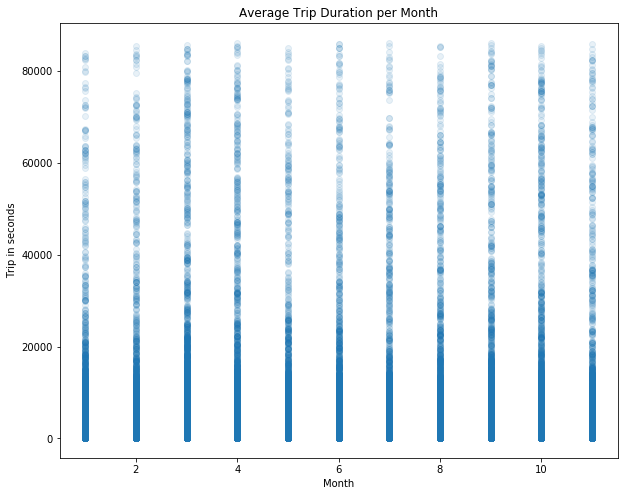

In [109]:
# since we are dealing with two quantitative variables, scatterplot is the choice
# set up our figure
plt.figure(figsize = [10,8])
#scatter the plots among duration and month
plt.scatter(data = df_copy , x = 'month' , y = 'duration_sec' , alpha = 0.1 )
plt.title('Average Trip Duration per Month')
plt.xlabel('Month')
plt.ylabel('Trip in seconds');

lets figure it out in minutes to observe the fact.

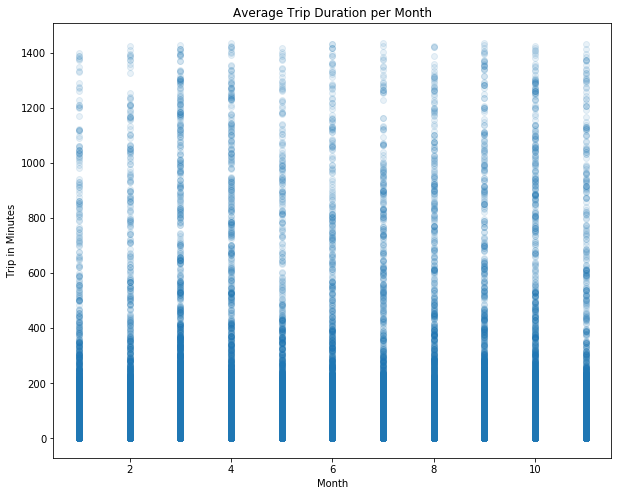

In [110]:
# since we are dealing with two quantitative variables, scatterplot is the choice
# set up our figure
plt.figure(figsize = [10,8])
#scatter the plots among duration and month
plt.scatter(data = df_copy , x = 'month' , y = 'duration_min' , alpha = 0.1 )
plt.title('Average Trip Duration per Month')
plt.xlabel('Month')
plt.ylabel('Trip in Minutes');

As we can see, people have bike trips mostly in March, April, and June.

**Q2: Who is considered sharing their bikes the most? customers or subscribers?**

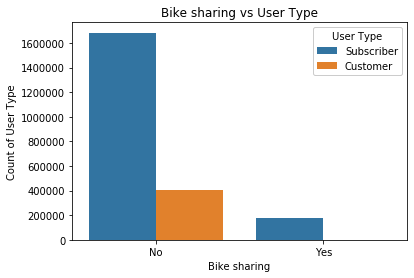

In [111]:
# since we are dealing with two categorical vairables, seaborn countplot function would be helpful
sb.countplot(data = df_copy, x = 'bike_share_for_all_trip', hue = 'user_type').set_title('Bike sharing vs User Type')
plt.legend(loc = 1, framealpha = 1, title = 'User Type')
plt.xlabel('Bike sharing')
plt.ylabel('Count of User Type');

As shown above, there is no customers sharing their bikes. In addition, Subscirbers do not share their bikes mostly, more than customers as clearly obsereved above. There is a low possibility that subscribers share their bike free for all.

**Q3: Is there a relation between Bike sharing and month? is it going to increase in a speicific month?**

In [143]:
df_copy.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,duration_min,month
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,4861,Subscriber,No,1347.083333,1


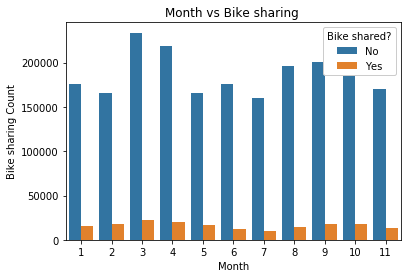

In [148]:
# since we are dealing with one categorical and one numeric we can use
sb.countplot(data = df_copy, x = 'month', hue = 'bike_share_for_all_trip').set_title('Month vs Bike sharing ')
plt.legend(loc = 1, framealpha = 1, title = 'Bike shared?')
plt.xlabel('Month')
plt.ylabel('Bike sharing Count');

As obsereved above, we can see that mostly users do not share their bikes. March is considered the highest month with sharing bikes free for all. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a relation between month and most bike trips duration as obsereved in the first question. March, April, and June are considered with the most bike trips. For the second question, we can clearly see that only subscribers have a low possibility sharing their bikes free for all. But, majority do not share their bikes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes in the second question, we can see there is no customer at all shares his/her bike free for all. In addition, majority of subscribers do not share their bikes.

## Multivariate Exploration

Relationships among plots of three or more variables.

**Q1: What is the relation between user type and trip duration with respect to month?**

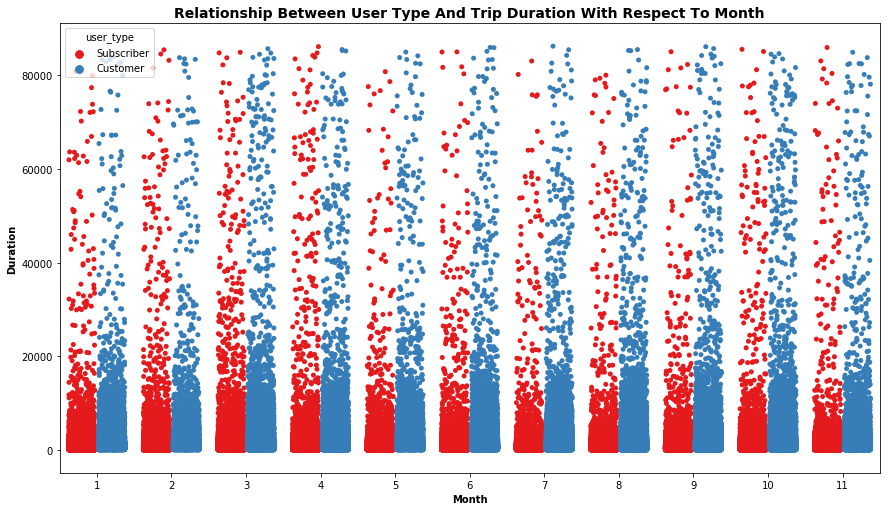

In [150]:
# stripplot is helpful here
plt.figure(figsize=[14.70,8.27])
sb.stripplot(data = df_copy, x='month',y='duration_sec', hue='user_type', palette='Set1'
            , jitter=0.35, dodge=True)
# add title
plt.title('Relationship between user type and trip duration with respect to month'.title(),
         fontsize=14, weight='bold')
# add x label
plt.xlabel('Month'.title(),
          fontsize=10, weight='bold')
# add y label
plt.ylabel('Duration'.title(),
          fontsize=10, weight='bold');

The more you come a subscriber, the more trips you will have during the year.

**Q2: Whta is the relation between bike sharing and month with respect to trip duration**

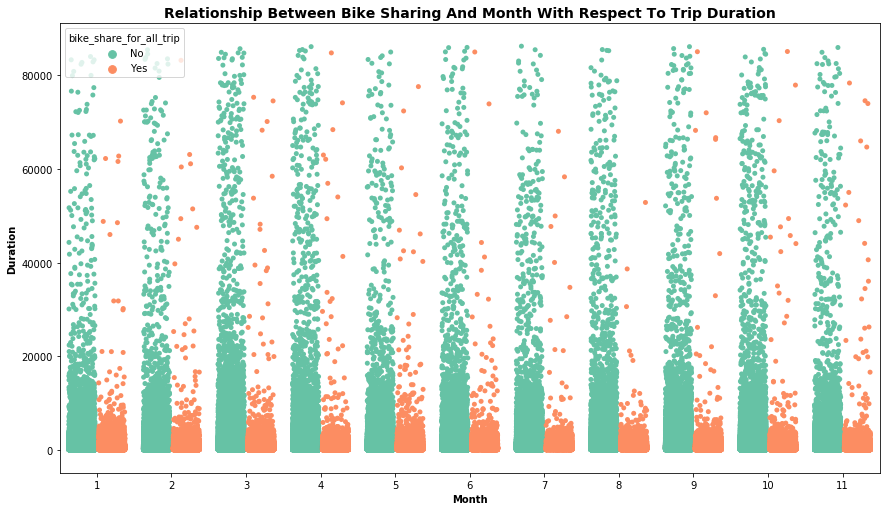

In [181]:
# stripplot is helpful here
plt.figure(figsize=[14.70,8.27])
sb.stripplot(data = df_copy, x='month',y='duration_sec', hue='bike_share_for_all_trip', palette='Set2'
            , jitter=0.35, dodge=True)
# add title
plt.title('Relationship between bike sharing and month with respect to trip duration'.title(),
         fontsize=14, weight='bold')
# add x label
plt.xlabel('Month'.title(),
          fontsize=10, weight='bold')
# add y label
plt.ylabel('Duration'.title(),
          fontsize=10, weight='bold');

As obsereved above, we can see clearly most useres do not share their bikes. The most sharing month is mostly May.

**Q3: What is the relation between user type and trip duration based on week day?**

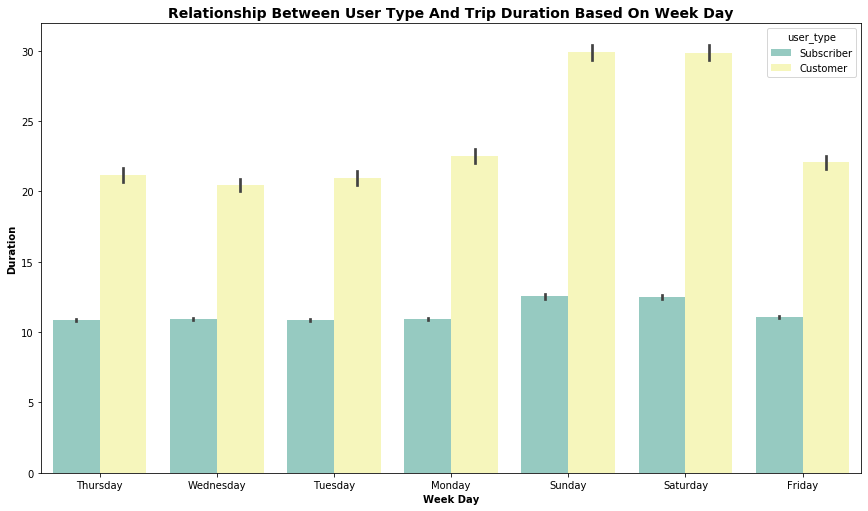

In [185]:
# since we have two categorical and one numeric catplot can help us to visalize the data
plt.figure(figsize=[14.70,8.27])
sb.barplot(x="week_day", y="duration_min", hue="user_type", data=df_copy, palette='Set3')
# add title
plt.title('Relationship between user type and trip duration based on week day'.title(),
         fontsize=14, weight='bold')
# add x label
plt.xlabel('Week Day'.title(),
          fontsize=10, weight='bold')
# add y label
plt.ylabel('Duration'.title(),
          fontsize=10, weight='bold');

As obsereved above, Weekends (saturday and sunday) have the most trips for both customer and subscriber. Weekdays are considered to be with less trips duration compared to weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As shown above, the graph can clearly show that subscribers are having more trips during the year. Which considered to be logical, since number of customers are less than subscribers. 

### Were there any interesting or surprising interactions between features?

I configured out that, the more you come a subscriber, the more trips you will have during the year.